In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

#importing additional and useful libreries

import matplotlib.pyplot as plt
import seaborn as sns

['AIJobsIndustry.csv']


In [2]:
# A quick view of the jobs data.

jobs_path = "../input/AIJobsIndustry.csv"
jobs_data = pd.read_csv(jobs_path)

jobs_data.head()

,JobTitle,Company,Location,CompanyReviews,Link
0,NaN,NaN,United States,NaN,https://www.indeed.com/jobs?q=Python+Data&star...
1,Data Science Development Program- Junior Data ...,\n MassMutual,"Amherst, MA 01002",628 reviews,https://www.indeed.com/jobs?q=Python+Data&star...
2,Sr. Data Scientist,\n Catasys,Home Based,6 reviews,https://www.indeed.com/jobs?q=Python+Data&star...
3,Object-oriented Programmer,\n Bank of America,"New York, NY 10281","19,303 reviews",https://www.indeed.com/jobs?q=Python+Data&star...
4,Entry-Level Cognitive / AI / Machine Learning ...,\n IBM,"Austin, TX 73344","18,926 reviews",https://www.indeed.com/jobs?q=Python+Data&star...


If we look the company column closely. The values have a little typo at the beginning. So let's remove it.

In [3]:
jobs_data['Company'] = jobs_data['Company'].map(lambda x: str(x)[5:])
jobs_data.head()


,JobTitle,Company,Location,CompanyReviews,Link
0,NaN,,United States,NaN,https://www.indeed.com/jobs?q=Python+Data&star...
1,Data Science Development Program- Junior Data ...,MassMutual,"Amherst, MA 01002",628 reviews,https://www.indeed.com/jobs?q=Python+Data&star...
2,Sr. Data Scientist,Catasys,Home Based,6 reviews,https://www.indeed.com/jobs?q=Python+Data&star...
3,Object-oriented Programmer,Bank of America,"New York, NY 10281","19,303 reviews",https://www.indeed.com/jobs?q=Python+Data&star...
4,Entry-Level Cognitive / AI / Machine Learning ...,IBM,"Austin, TX 73344","18,926 reviews",https://www.indeed.com/jobs?q=Python+Data&star...


In [4]:
# Finding total number of unique job title in the dataset

total_unique_jobs = jobs_data["JobTitle"].nunique()
print("Total number of jobs titles in all companies:", total_unique_jobs)

# Most offered jobs across all companies
most_common_jobs = jobs_data.groupby(["JobTitle"]).Company.count()
most_common_jobs = most_common_jobs.reset_index(name="Company")
most_common_jobs = most_common_jobs.sort_values(["Company"], ascending=False)
print("\nTop 10 most wanted data science related jobs: ")
most_common_jobs = most_common_jobs.head(20)
most_common_jobs.head(10)

Total number of jobs titles in all companies: 20578

Top 10 most wanted data science related jobs: 


,JobTitle,Company
5404,Data Scientist,1867
5011,Data Engineer,491
17175,Software Engineer,419
4669,Data Analyst,391
15827,Senior Data Scientist,292
6330,DevOps Engineer,233
2280,Big Data Engineer,214
2593,Business Analyst,212
10977,Machine Learning Engineer,206
7829,Full Stack Developer,159


Text(0, 0.5, 'Number of jobs')

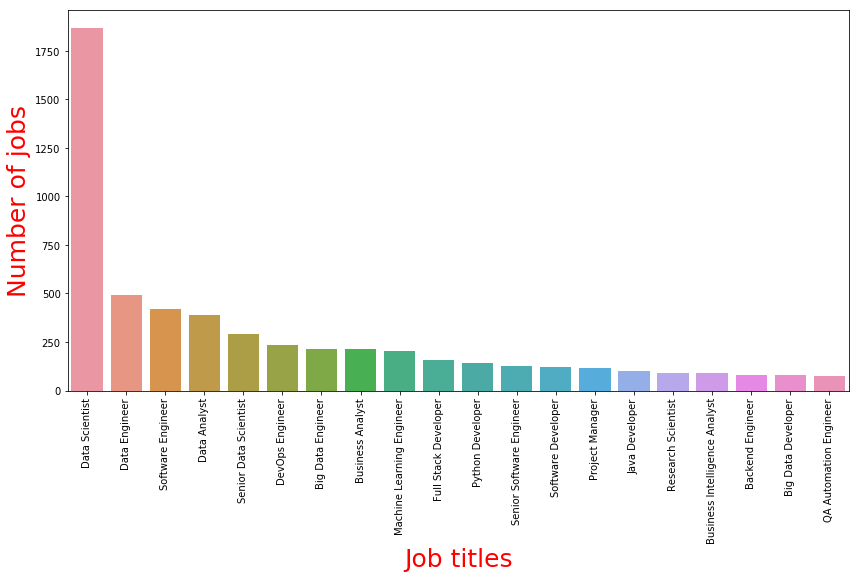

In [5]:
# Plotting graph of data science roles

fig, bars=plt.subplots(figsize=(14,7))
bars = sns.barplot(data=most_common_jobs, x="JobTitle", y="Company")
bars.set_xticklabels(most_common_jobs["JobTitle"], rotation=90)
bars.set_xlabel("Job titles", fontsize=25, color="red")
bars.set_ylabel("Number of jobs", fontsize=25, color="red")

In [6]:
# Finding companies looking for data science talent.

total_companies = jobs_data["Company"].nunique()
print("Total number of companies offering data science jobs:", total_companies)

# Finding number of jobs per company
companies_with_more_jobs = jobs_data.groupby(["Company"])["JobTitle"].count()
companies_with_more_jobs = companies_with_more_jobs.reset_index(name="JobTitle")
companies_with_more_jobs = companies_with_more_jobs.sort_values(["JobTitle"], ascending=False)
pareto_df = companies_with_more_jobs
companies_with_more_jobs = companies_with_more_jobs.head(20)
print("\nTop 10 companies with more open roles:")
companies_with_more_jobs = companies_with_more_jobs[1:]
companies_with_more_jobs.head(10)



Total number of companies offering data science jobs: 2952

Top 10 companies with more open roles:


,Company,JobTitle
1078,Google,674
193,Amazon.com,527
91,Accenture,406
1210,IBM,406
1644,Microsoft,385
1865,Oracle,352
2003,Qatar Computing Research Institute,343
1298,Intel,292
1989,PwC,217
1609,McKinsey & Company,196


Text(0, 0.5, 'Number of jobs')

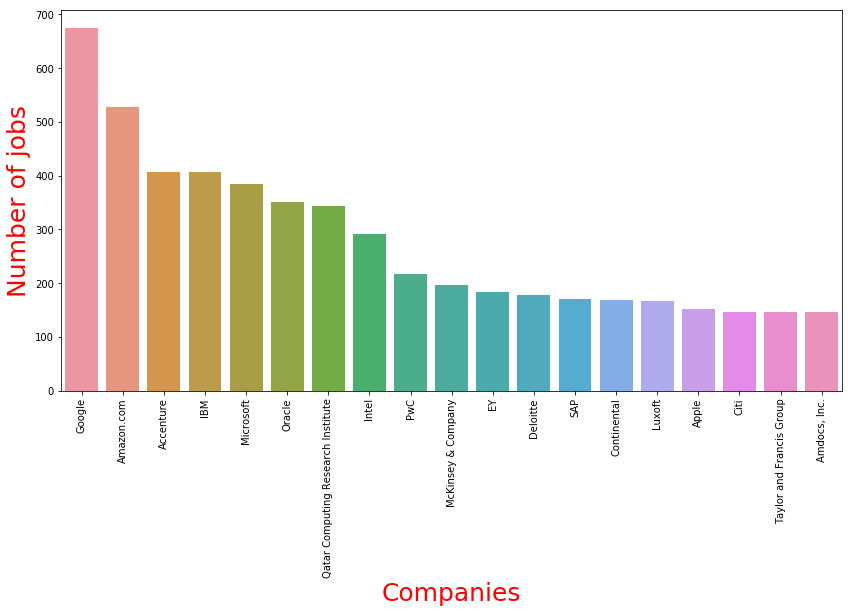

In [7]:
fig, bars=plt.subplots(figsize=(14,7))
bars = sns.barplot(data=companies_with_more_jobs, x="Company", y="JobTitle")
bars.set_xticklabels(companies_with_more_jobs["Company"], rotation=90)
bars.set_xlabel("Companies", fontsize=25, color="red")
bars.set_ylabel("Number of jobs", fontsize=25, color="red")

In [8]:
# Cities with data science roles

number_of_cities = jobs_data["Location"].nunique()
print("Total number of cities is:", number_of_cities)

cities_with_more_jobs = jobs_data.groupby(["Location"])["JobTitle"].count()
cities_with_more_jobs = cities_with_more_jobs.reset_index(name="JobTitle")
cities_with_more_jobs = cities_with_more_jobs.sort_values(["JobTitle"], ascending=False)
cities_with_more_jobs = cities_with_more_jobs.head(20)
print("\nTop 10 locations with more jobs:")
cities_with_more_jobs.head(10)

Total number of cities is: 2702

Top 10 locations with more jobs:


,Location,JobTitle
1157,London,1220
320,Budapest,841
2597,東京都,814
1927,Singapore,802
864,Hong Kong,708
943,Jakarta,708
582,Doha,702
1208,Luxembourg,688
594,Dublin,651
1983,Stockholm,647


Text(0, 0.5, 'Number of jobs')

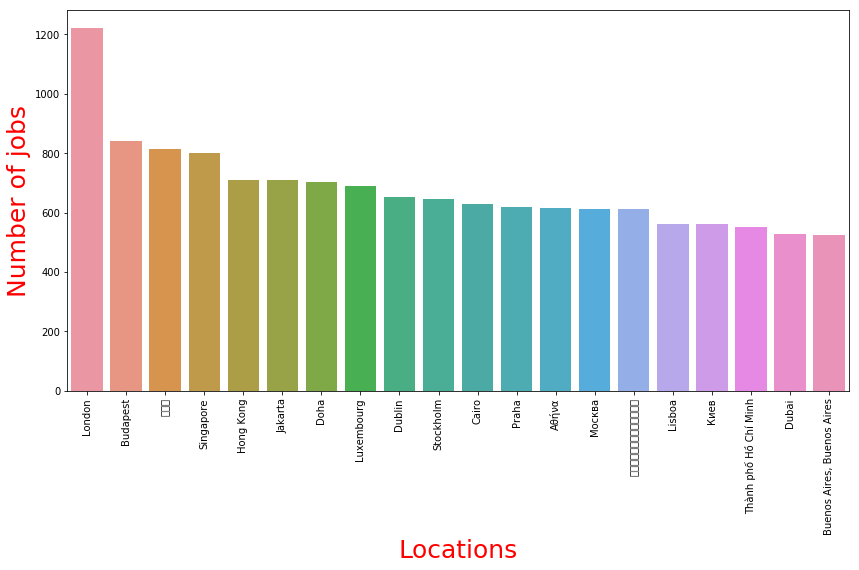

In [9]:
fig, bars=plt.subplots(figsize=(14,7))
bars = sns.barplot(data=cities_with_more_jobs, x="Location", y="JobTitle")
bars.set_xticklabels(cities_with_more_jobs["Location"], rotation=90)
bars.set_xlabel("Locations", fontsize=25, color="red")
bars.set_ylabel("Number of jobs", fontsize=25, color="red")

# Conclusions

We explored the data trying to get insights about the data science job market on earth. And according with the dataset we used, These are some of the conclusions:

* Data scientist is clearly the most wanted rol by companies. To me, this is because the term "Data scientist" is broadly use to reffered to some that work with data and what that means for a company do not necessary means for the others.

* Tech giants like Google and Amazon are the ones who have more open roles. Follow by other traditional well known companies.

* London appears as the city with more available jobs, however data shows us that there are plenty of opportunities accross the globe.

#### So, there are many and diverse jobs available, great companies are looking for talent and there are opportunities in many locations. My biggest conclusion is that:
### It is an exciting time to work in the data science industry!!!